In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

Populating the interactive namespace from numpy and matplotlib


In [2]:
counts = pd.read_csv('Data/Brain3_treated_hp_tissue.tsv', sep='\t',index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes
print(counts.shape)
counts.iloc[:5, :5]

(62, 9091)


,ENSMUSG00000098104,ENSMUSG00000033845,ENSMUSG00000025903,ENSMUSG00000033813,ENSMUSG00000002459
19.09x18.08,0.0,0.0,0.0,0.0,0.0
19.02x19.14,0.0,0.0,0.0,0.0,0.0
19.02x20.09,0.0,0.0,0.0,0.0,0.0
19.02x21.1,0.0,0.0,0.0,0.0,0.0
19.02x22.05,0.0,0.0,0.0,0.0,0.0


In [3]:
sample_info = pd.DataFrame(0, index = counts.index, columns = ['x','y','total_counts'])
sample_info.loc[:,'x'] = [float(item.split('x')[0]) for item in sample_info.index]
sample_info.loc[:,'y'] = [float(item.split('x')[1]) for item in sample_info.index]
sample_info.loc[:,'total_counts'] = counts.sum(axis=1)
sample_info.head(5)

,x,y,total_counts
19.09x18.08,19.09,18.08,1762.0
19.02x19.14,19.02,19.14,3405.0
19.02x20.09,19.02,20.09,6049.0
19.02x21.1,19.02,21.10,3091.0
19.02x22.05,19.02,22.05,2853.0


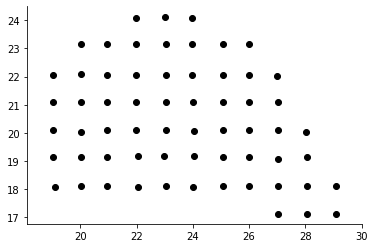

In [4]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');

In [5]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [6]:
sample_resid_expr = resid_expr.sample(n=len(counts.columns), axis=1, random_state=1)

X = sample_info[['x', 'y']]
sample_resid_expr.head()
results = SpatialDE.run(X, sample_resid_expr)

In [7]:
results.head().T

,0,1,2,3,4
FSV,2.05157e-09,2.05157e-09,2.05157e-09,2.05157e-09,2.05157e-09
M,4,4,4,4,4
g,ENSMUSG00000064372,ENSMUSG00000031983,ENSMUSG00000030990,ENSMUSG00000082884,ENSMUSG00000021867
l,0.440114,0.440114,0.440114,0.440114,0.440114
max_delta,4.85165e+08,4.85165e+08,4.85165e+08,4.85165e+08,4.85165e+08
max_ll,30.6662,57.2233,76.7262,3.71194,97.6605
max_mu_hat,1.50383,1.73644,1.49776,0.586625,1.51968
max_s2_t_hat,4.70617e-09,6.23392e-09,4.63392e-09,8.16364e-10,4.76525e-09
model,SE,SE,SE,SE,SE
n,62,62,62,62,62


In [8]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

,g,l,pval,qval
8878,ENSMUSG00000098178,2.524773,0.000008,0.074258
7960,ENSMUSG00000032269,1.054129,0.000045,0.206506
6055,ENSMUSG00000053510,0.440114,0.949094,0.949094
6056,ENSMUSG00000020895,0.440114,0.949094,0.949094
6057,ENSMUSG00000004098,0.440114,0.949094,0.949094


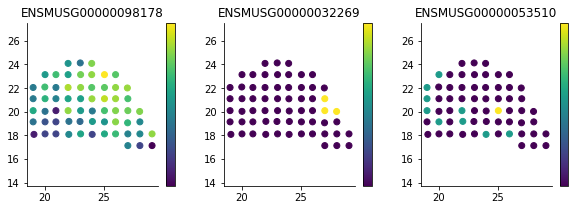

In [9]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000098178', 'ENSMUSG00000032269', 'ENSMUSG00000053510']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [10]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
3035,ENSMUSG00000057335,0.440114,0.949094
3026,ENSMUSG00000000416,0.440114,0.949094
3028,ENSMUSG00000029419,0.440114,0.949094
3029,ENSMUSG00000017428,0.440114,0.949094
3030,ENSMUSG00000038544,0.440114,0.949094
3031,ENSMUSG00000028556,0.440114,0.949094
3032,ENSMUSG00000094955,0.440114,0.949094
3033,ENSMUSG00000059058,0.440114,0.949094
3027,ENSMUSG00000028410,0.440114,0.949094
9090,ENSMUSG00000039542,9.358701,0.949094


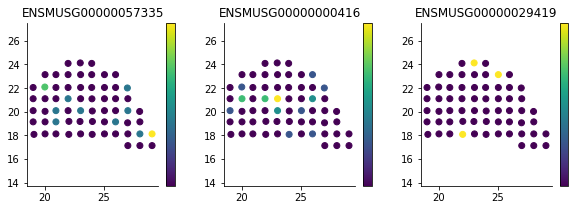

In [11]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000057335', 'ENSMUSG00000000416', 'ENSMUSG00000029419']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

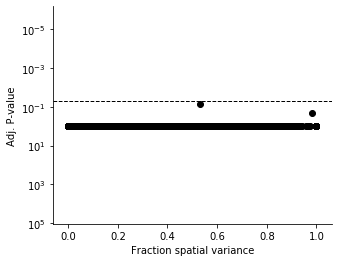

In [12]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');